Um projétil é disparado para cima com uma inclinação (ângulo de inclinação ϕ
) com velocidade inicial vi
 em um ângulo θ
 em relação à horizontal (θ>ϕ
), como mostrado na Figura.

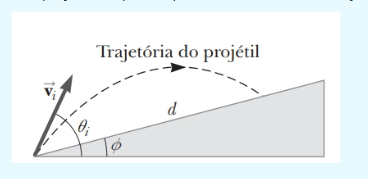

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo

c) Modifique seu programa da letra b) para comparar as alturas e encontrar o tempo que há a colisão entre o projétil e o plano. Qual o valor do tempo?

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

a) Escreva um programa que mostre as posições x e y do projétil em função do tempo

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#função que calcula a trajetória do projétil
def traj_projetil(v0=None, theta=None, phi=None, g=9.8, dt=0.01):
    if v0 is None:
        v0 = int(input('Insira seu v0: '))
    if theta is None:
        theta = int(input('Insira seu theta: '))
    if phi is None:
        phi = int(input('Insira seu phi: '))


   #calculamos os angulos em radianos
    theta_rad = np.radians(theta)
    phi_rad = np.radians(phi)

    #calculos as componentes do vetor velocidade
    v0x = v0 * np.cos(theta_rad)
    v0y =v0 * np.sin(phi_rad)

    #tempo que o projetil leva para atingir o chão (tempo maximo)
    t_max = 2 * v0y / g

    #armazenando dados como arrays
    t = np.arange(0, t_max, dt)
    x = v0x * t
    y = v0y * t - 0.5 * g * t**2

    #removemos valores negativos 
    mask = y >= 0
    t = t[mask]
    x = x[mask]
    y = y[mask]

    return t, x, y

#v0 = int(input('Insira seu v0: '))
#theta = int(input('Insira seu theta: '))
#phi = int(input('Insira seu phi: '))

t, x, y = traj_projetil()
print("Tempo (t):", t)
print("Posição x:", x)
print("Posição y:", y)

# Plotando a trajetoria
plt.plot(x, y)
plt.xlabel('Distância (x)')
plt.ylabel('Altura (y)')
plt.title('Trajetória do Projétil')
plt.grid()
plt.show()
    

a) 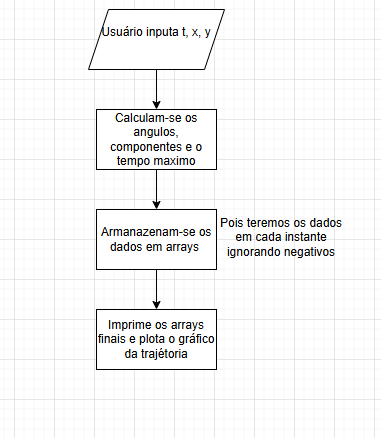

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

b) Modifique seu programa para calcular simulataneamente a posição x e y do projétil e a altura y do plano (relativo ao x do projétil) em função do tempo
